In [54]:
#importing modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette(palette='viridis')
sns.set_style(style='dark')

In [2]:
path = r"C:\Users\M D\Downloads\archive\trending_football_players.xlsx"

### Initial Exploration

In [3]:
#reading in data
players = pd.read_excel(path)
players.head()

,Player_name,Images,Age,National_team,Positions,Overall,Potential_overall,Current_club,Current_contract,Value,Wage,Total_stats
0,T. Almada,https://cdn.sofifa.net/players/245/371/24_60.png,22,Argentina,"['CAM', 'CM', 'CF']",79,87,Atlanta United,2022 ~ 2025,€39.5M,€10K,2050
1,L. Palma,https://cdn.sofifa.net/player_0.svg,23,Honduras,['LW'],69,75,Celtic,2023 ~ 2028,€2.2M,€22K,1794
2,R. Lavia,https://cdn.sofifa.net/players/263/620/24_60.png,19,Belgium,['CDM'],73,86,Chelsea,2023 ~ 2030,€7M,€32K,1829
3,W. Zaïre-Emery,https://cdn.sofifa.net/players/270/673/24_60.png,17,France,"['CM', 'CDM']",77,89,Paris Saint Germain,2022 ~ 2025,€24M,€9K,2080
4,Gabri Veiga,https://cdn.sofifa.net/players/258/729/24_60.png,21,Spain,"['CM', 'CAM']",78,89,Al Ahli Jeddah,2023 ~ 2026,€31.5M,€28K,1944


In [4]:
#total entries
players.shape

(3000, 12)

i have 3000  players in the dataframe

In [5]:
#dont need the images columns
players.drop('Images',axis=1 , inplace=True)

Dropping Duplicates if any exists 

In [6]:
players = players.drop_duplicates()

In [7]:
players.shape

(2299, 11)

i have 2299 players now after dropping the duplicated player

In [8]:
#setting names as index
players.set_index('Player_name', inplace=True)
players.head()

,Age,National_team,Positions,Overall,Potential_overall,Current_club,Current_contract,Value,Wage,Total_stats
Player_name,,,,,,,,,,
T. Almada,22,Argentina,"['CAM', 'CM', 'CF']",79,87,Atlanta United,2022 ~ 2025,€39.5M,€10K,2050
L. Palma,23,Honduras,['LW'],69,75,Celtic,2023 ~ 2028,€2.2M,€22K,1794
R. Lavia,19,Belgium,['CDM'],73,86,Chelsea,2023 ~ 2030,€7M,€32K,1829
W. Zaïre-Emery,17,France,"['CM', 'CDM']",77,89,Paris Saint Germain,2022 ~ 2025,€24M,€9K,2080
Gabri Veiga,21,Spain,"['CM', 'CAM']",78,89,Al Ahli Jeddah,2023 ~ 2026,€31.5M,€28K,1944


In [9]:
#getting info on data frame 
players.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2299 entries, T. Almada to T. Băluță
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2299 non-null   int64 
 1   National_team      2299 non-null   object
 2   Positions          2299 non-null   object
 3   Overall            2299 non-null   int64 
 4   Potential_overall  2299 non-null   int64 
 5   Current_club       2299 non-null   object
 6   Current_contract   2299 non-null   object
 7   Value              2299 non-null   object
 8   Wage               2299 non-null   object
 9   Total_stats        2299 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 197.6+ KB


In [10]:
#checking 
players.isna().sum().reset_index()

,index,0
0,Age,0
1,National_team,0
2,Positions,0
3,Overall,0
4,Potential_overall,0
5,Current_club,0
6,Current_contract,0
7,Value,0
8,Wage,0
9,Total_stats,0


#  EXPLORATORY DATA ANALYSIS (EDA) 
## UNIVARIATE ANALYSIS

### Feature: Age

In [11]:
players.Age.describe()

count    2299.000000
mean       24.035668
std         4.493350
min        16.000000
25%        21.000000
50%        23.000000
75%        27.000000
max        44.000000
Name: Age, dtype: float64

In [12]:
#boxplot fun
def boxplt(df,column):
    """takes df and column returns its boxplot"""
    sns.boxplot(data=df[column])
    plt.title(f'Boxplot of the Players {column}')
    plt.ylabel(f'{column}')

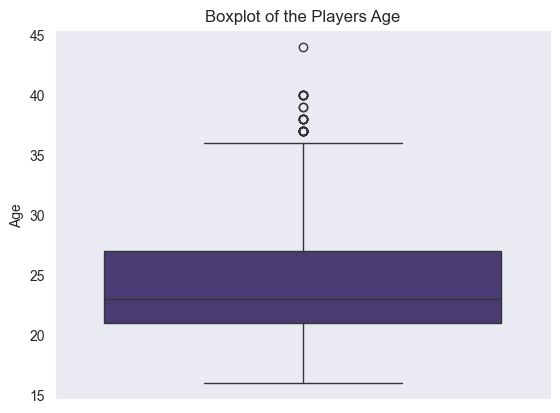

In [13]:
#boxplot of Age
boxplt(players,"Age")

looks we have some outliners.

In [14]:
#taking care of outliners and description
def interquantile_range(df , column):
    """ takes df and column  returns the IQR and Confid Level intervals"""
    #locating the outliners players according to the age 
    percentile_1 = df[column].quantile(q=0.75)
    percentile_3 = df[column].quantile(q=0.25)
    IQR = percentile_1-percentile_3

    #creating CL intervals
    lower_limit = percentile_1 - 1.5*IQR 
    upper_limit = percentile_3 + 1.5*IQR
    lower_limit ,upper_limit
    

    def IQR_summary(df=df,column=column):
        players_below_lowerlimit = df[df[column]< lower_limit].groupby('Player_name').size().sum()
        players_above_upperlimit = df[df[column]> upper_limit].groupby('Player_name').size().sum()
        players_inbetween = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)].groupby('Player_name').size().sum()
        return print(f'players below {lower_limit:.0f} {column} are {players_below_lowerlimit} players\nplayers above {upper_limit:.0f} {column} are {players_above_upperlimit} players\nplayers between {lower_limit:.0f} {column} and {upper_limit:.0f} {column} are {players_inbetween} players')
    
    return print (f'IQR:{IQR},Lower_Limit:{lower_limit},Upper_Limit:{upper_limit}'),IQR_summary(df,column)
    

In [15]:
#locating the outliners players according to the age 
interquantile_range(players,"Age")

IQR:6.0,Lower_Limit:18.0,Upper_Limit:30.0
players below 18 Age are 56 players
players above 30 Age are 219 players
players between 18 Age and 30 Age are 2024 players


(None, None)

In [16]:
#getting histogram plot
def histogram(df,column,bins=20):
    """ Takes df.column as df and column returns histplot """
    fig, ax = plt.subplots(figsize=(9,4))
    sns.histplot(data=df,bins=bins,ax=ax , kde=True)
    ax.set_title(f'Histogram of the Players {column}')
    ax.set_xlabel(column)
    ax.set_ylabel("Frequency")



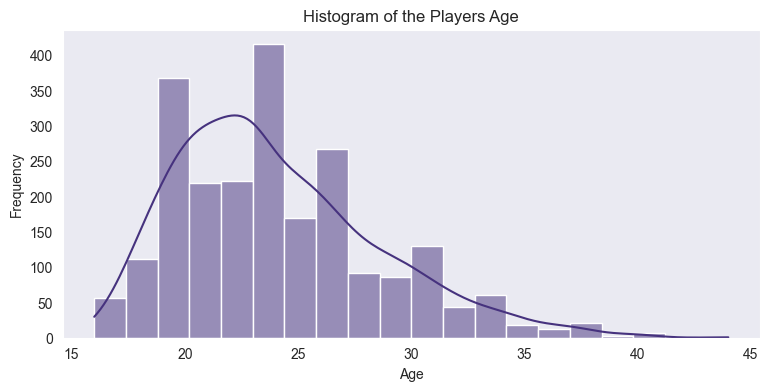

In [17]:
#visualising histogram 
histogram(players.Age, "Age")



In [18]:
#for checking for normality 
from scipy.stats import shapiro
def check_normality(df,column):
    # Perform Shapiro-Wilk test
    statistic, p_value = shapiro(df[column])
    
    # Display the results
    print(f"Shapiro-Wilk Test Statistic: {statistic}")
    print(f"P-value: {p_value}")
    
    # Checking the significance level (commonly 0.05)
    alpha = 0.05
    if p_value > alpha:
        print(f"{column} is  likely to be follow  a normal distribution.")
    else:
        print(f"{column} does not likely  follow a normal distribution.")


In [19]:
check_normality(players,'Age')

Shapiro-Wilk Test Statistic: 0.9495247006416321
P-value: 2.0135025567375068e-27
Age does not likely  follow a normal distribution.


In [20]:
#querying  df for the max age  
players[players['Age']==players['Age'].max()]

,Age,National_team,Positions,Overall,Potential_overall,Current_club,Current_contract,Value,Wage,Total_stats
Player_name,,,,,,,,,,
23\n G. Buffon,44,Italy,['GK'],77,77,Parma,2021 ~ 2024,€1.2M,€3K,1244


In [21]:
#querying  df for the min age  
players[players['Age']==players['Age'].min()]

,Age,National_team,Positions,Overall,Potential_overall,Current_club,Current_contract,Value,Wage,Total_stats
Player_name,,,,,,,,,,
G. Ilenikhena,16,France,['ST'],64,84,Antwerp,2023 ~ 2027,€1.6M,€1K,1561
B. Rice,16,Scotland,['CDM'],59,85,Rangers,2021 ~ 2026,€875K,€500,1524
L. Miller,16,Scotland,['CM'],59,85,Motherwell,2022 ~ 2025,€900K,€500,1621
S. Amo-Ameyaw,16,England,"['LW', 'RW']",60,80,Southampton,2023 ~ 2026,€675K,€1K,1493
F. Rózga,16,Poland,['LM'],56,79,Cracovia Kraków,2023 ~ 2026,€450K,€500,1344
F. Rodríguez-Gentile,16,Argentina,['ST'],57,81,Preston North End,2023 ~ 2025,€525K,€1K,1386
H. Koch,16,Germany,['ST'],57,77,DSC Arminia Bielefeld,2023 ~ 2026,€450K,€500,1383
M. Egbring,16,Netherlands,['RB'],58,78,Vitesse,2023 ~ 2026,€525K,€500,1443
K. Kolanko,16,Poland,['LM'],55,80,Górnik Zabrze,2022 ~ 2024,€400K,€500,1344


### Observations:
    Age is skewed to the Right .(indicates younger players are prefered to older players )
    Maximum age is found to be 44yrs that being player 23\n G. Buffo  from club Parma,
    median Age is 23yrs and minimum Age is 16yrs . 
    Mean age is 24yrs 
    With 56 players below the age of 18yrs and 219 players above the Age of 30yrs and 2024 players between the ages of 18yrs 30yrs 
    Most players  are in the Age range  of 17yrs to 26yrs.
    There are few and fewer players passed Age 30yrs 


### Feature: National team

In [22]:
#getting description
players.National_team.describe()

count        2299
unique        112
top       England
freq          241
Name: National_team, dtype: object

[Text(0, 0, 'England'),
 Text(1, 0, 'Spain'),
 Text(2, 0, 'France'),
 Text(3, 0, 'Germany'),
 Text(4, 0, 'Brazil'),
 Text(5, 0, 'Argentina'),
 Text(6, 0, 'Italy'),
 Text(7, 0, 'Portugal'),
 Text(8, 0, 'Netherlands'),
 Text(9, 0, 'Belgium')]

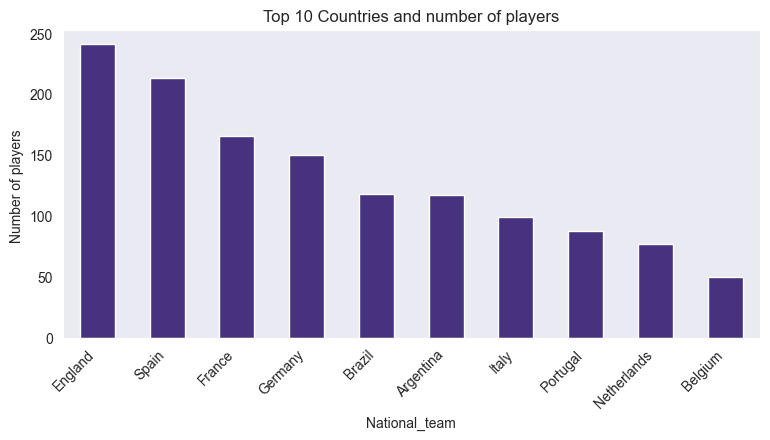

In [23]:
#Top 10 countries with the highest player count  
players_by_National_team = players.National_team.value_counts().head(10)
fig, ax = plt.subplots(figsize=(9,4))
ax = players_by_National_team.plot(kind='bar',
                                       title="Top 10 Countries and number of players",
                                       ylabel='Number of players ')
ax.set_xticklabels(players_by_National_team.index, rotation=45, ha='right')

### Observations:
    There are 112 National teams in the data frame
    The top 10 countries in descending order from  country with the highest number of players to country with least 
    England has the most count of players (241) followed by spain then France,Germany,bazil,argentina,italy,Portgual,Netherlands and belguim
    South africa only has 1 player 

    

### Feature: Positions

In [24]:
#getting df columns 
players.columns


Index(['Age', 'National_team', 'Positions', 'Overall', 'Potential_overall',
       'Current_club', 'Current_contract', 'Value', 'Wage', 'Total_stats'],
      dtype='object')

C:\Users\M D\AppData\Local\Temp\ipykernel_14784\1976991380.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(players.Positions.value_counts().head(10).index,rotation=45, ha='right')


[Text(0, 0, "['CB']"),
 Text(1, 0, "['ST']"),
 Text(2, 0, "['GK']"),
 Text(3, 0, "['CDM', 'CM']"),
 Text(4, 0, "['CM', 'CDM']"),
 Text(5, 0, "['CM']"),
 Text(6, 0, "['CAM', 'CM']"),
 Text(7, 0, "['LB']"),
 Text(8, 0, "['CM', 'CAM']"),
 Text(9, 0, "['RB']")]

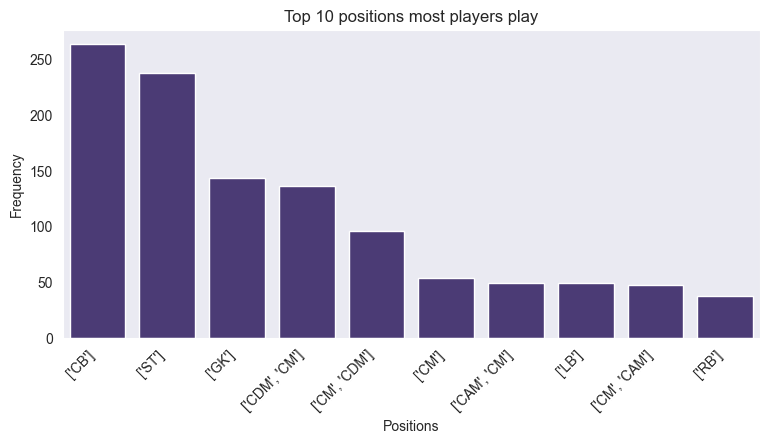

In [25]:
#querying df for top 10 positions 
positions_df = players.Positions.value_counts().head(10).reset_index()
positions_df
fig, ax = plt.subplots(figsize=(9,4))
ax = sns.barplot(data=positions_df, x='Positions',y='count' )
ax.set_title('Top 10 positions most players play')
ax.set_ylabel("Frequency")
ax.set_xticklabels(players.Positions.value_counts().head(10).index,rotation=45, ha='right')



### Observations:
    The Top 10 positions played by players in the dataframe play are [CB],[ST],[GK],[CDM,CM]
    

### Feature: Current_club

[Text(0, 0, 'Real Madrid'),
 Text(1, 0, 'Manchester United'),
 Text(2, 0, 'Paris Saint Germain'),
 Text(3, 0, 'Manchester City'),
 Text(4, 0, 'Tottenham Hotspur'),
 Text(5, 0, 'Chelsea'),
 Text(6, 0, 'FC Barcelona'),
 Text(7, 0, 'Arsenal'),
 Text(8, 0, 'Milan'),
 Text(9, 0, 'Bayer 04 Leverkusen')]

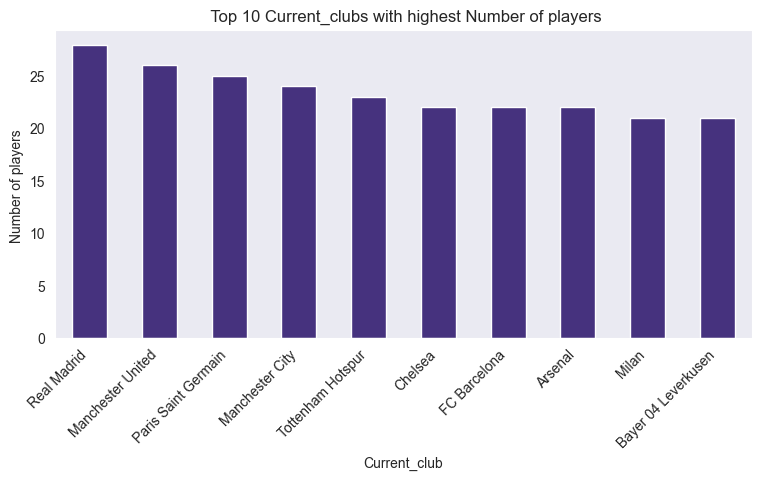

In [26]:
#looking at the top 10 clubs with most players
players_by_Current_club = players.Current_club.value_counts().head(10)
fig, ax = plt.subplots(figsize=(9,4))
ax = players_by_Current_club.plot(kind='bar',
                                       title=" Top 10 Current_clubs with highest Number of players" ,
                                       ylabel='Number of players ')
ax.set_xticklabels(players_by_Current_club.index, rotation=45, ha='right')

In [27]:
#clubs with less than 11 players 
less_than_11_players = players.Current_club.value_counts().reset_index()
less_than_11_players[less_than_11_players['count']<=11].describe()

,count
count,411.000000
mean,3.043796
std,2.438118
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,11.000000


### Observations:
    Real mardrid has the largest number of players then followed by Manchester united then Paris Saint Germain as 
    seen about in the bar chart of the top 10 clubs with the largest number of players in the dataframe
    There are 411 clubs with less than or equal to  11 players in the dataframe 

### Feature: Overall

In [28]:
players.Overall.describe()

count    2299.000000
mean       72.558939
std         6.867031
min        49.000000
25%        68.000000
50%        73.000000
75%        77.000000
max        91.000000
Name: Overall, dtype: float64

In [29]:
#querying  df for the max overall 
players[players['Overall']==players['Overall'].max()]

,Age,National_team,Positions,Overall,Potential_overall,Current_club,Current_contract,Value,Wage,Total_stats
Player_name,,,,,,,,,,
E. Haaland,22,Norway,['ST'],91,94,Manchester City,2022 ~ 2027,€185M,€340K,2158
K. Mbappé,24,France,"['ST', 'LW']",91,94,Paris Saint Germain,2018 ~ 2024,€181.5M,€230K,2204
K. De Bruyne,32,Belgium,"['CM', 'CAM']",91,91,Manchester City,2015 ~ 2025,€103M,€350K,2317


In [30]:
#querying  df for the min overall 
players[players['Overall']==players['Overall'].min()]

,Age,National_team,Positions,Overall,Potential_overall,Current_club,Current_contract,Value,Wage,Total_stats
Player_name,,,,,,,,,,
O. Cisneros,19,United States,"['CM', 'CAM']",49,63,Sporting Kansas City,2021 ~ 2023,€110K,€650,1414


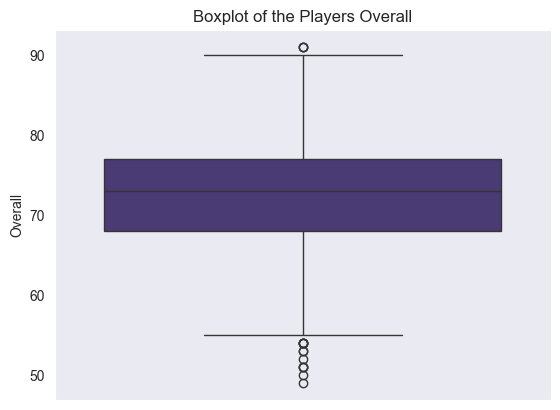

In [31]:
#boxplot of Overall
boxplt(players,"Overall")

We have a few outliners at the bottom of the 25th quantile 

In [32]:
#getting outliner info 
interquantile_range(players,"Overall")

IQR:9.0,Lower_Limit:63.5,Upper_Limit:81.5
players below 64 Overall are 246 players
players above 82 Overall are 211 players
players between 64 Overall and 82 Overall are 1842 players


(None, None)

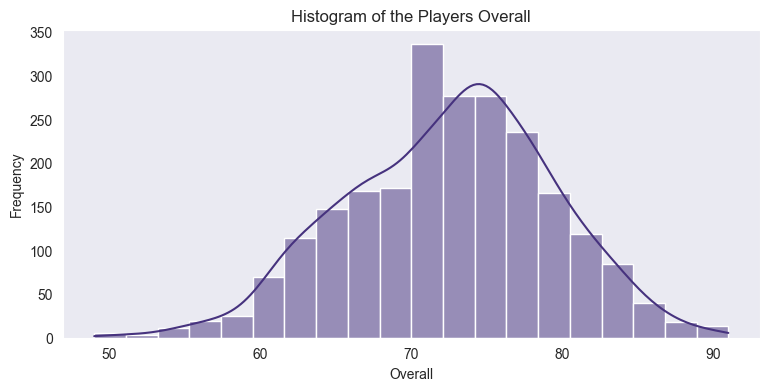

In [33]:
histogram(players.Overall,"Overall")

In [34]:
check_normality(players,"Overall")

Shapiro-Wilk Test Statistic: 0.9937113523483276
P-value: 2.3701449691770904e-08
Overall does not likely  follow a normal distribution.


mean is almost equal to the median its normally distributed 

### Observations:
    Maximun overall score is 91 belonging to players  E. Haaland from club Mancity, K. Mbappé from club Paris Saint Germain 
    and K. De Bruyne from club Mancity
    Median Overall is 73
    Minimum overall score is 49  belonging to player O. Cisneros from club Sporting Kansas city rs

### Feature: Current_contract

In [35]:
#cleaning Current_contract column 
default_value = 0
players[['Contract_start_year','Contract_end_year']] = players.Current_contract.str.split("~",expand=True)
#players[['Contract_start_year','Contract_end_year']].astype(int)
players['Contract_end_year'] = pd.to_numeric(players['Contract_end_year'])

players['Contract_start_year'] = players['Contract_start_year'].str.extract(r'(\d{4})').fillna(default_value).astype(int)
start_year_contract_summary = players['Contract_start_year'].value_counts().reset_index()
end_year_contract_summary = players['Contract_end_year'].value_counts().reset_index()



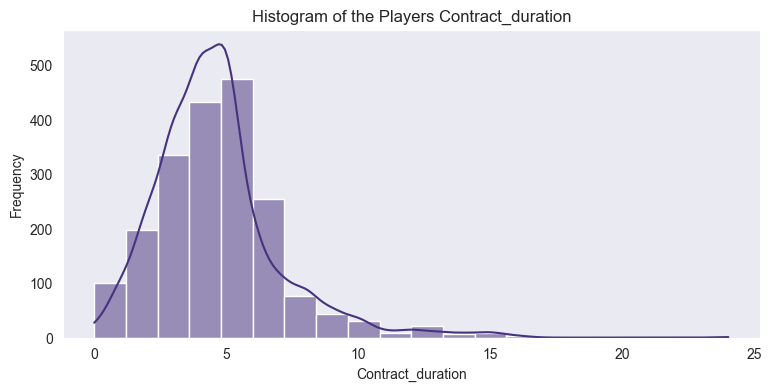

In [36]:
#finding contract duration
players['Contract_duration'] = players['Contract_end_year'] - players['Contract_start_year']
histogram(players.Contract_duration,"Contract_duration")


In [37]:
#interquantile description
interquantile_range(players, "Contract_duration")

IQR:2.0,Lower_Limit:2.0,Upper_Limit:6.0
players below 2 Contract_duration are 101 players
players above 6 Contract_duration are 292 players
players between 2 Contract_duration and 6 Contract_duration are 1603 players


(None, None)

In [38]:
#querying free players
Free_players = players[players['Current_contract']=='Free'].reset_index()
Free_players.shape[0]

55

### Observations:
    303 have no contract duration
    101 players have Contract_duration below 2 years
    55 play for  Free hence Wages-->€0 
    Most players (1603) contracts are 2 to 6 years long. 
    There are 292 players  with contracts above 6 years 
    645 players data on there contract is unclear, we have no idea when they were signed.some have sign data and no contract end date and vice versia
    
                                                                                                           
                                                                                                           
     


### Feature: Wage

In [39]:
#cleaning wage feature removing special characters
import re
def clean_value(value, pattern):
    match = re.search(r'\d+(\.\d+)?', value)
    if match:
        numeric_value = float(match.group())
        if 'M' in pattern:
            return int(numeric_value * 1e6)
        elif 'K' in pattern:
            return int(numeric_value * 1e3)
    return None


In [40]:
players['Cleaned_Wage'] = players['Wage'].apply(lambda x: clean_value(x, 'M') if 'M' in x else clean_value(x, 'K'))
players['Cleaned_Wage']


Player_name
T. Almada         10000
L. Palma          22000
R. Lavia          32000
W. Zaïre-Emery     9000
Gabri Veiga       28000
                  ...  
D. Polvara         1000
San Román          3000
F. Hornby         11000
Klauss             9000
T. Băluță          6000
Name: Cleaned_Wage, Length: 2299, dtype: int64

In [41]:
#checking for nulls in Wage 
players.Cleaned_Wage.isna().sum()


0

In [42]:
#stat description 
players['Cleaned_Wage'].describe()

count      2299.000000
mean      69816.876903
std      155929.549245
min           0.000000
25%        7000.000000
50%       19000.000000
75%       49000.000000
max      950000.000000
Name: Cleaned_Wage, dtype: float64

In [43]:
#IQR summary
interquantile_range(players, "Cleaned_Wage")

IQR:42000.0,Lower_Limit:-14000.0,Upper_Limit:70000.0
players below -14000 Cleaned_Wage are 0 players
players above 70000 Cleaned_Wage are 389 players
players between -14000 Cleaned_Wage and 70000 Cleaned_Wage are 1910 players


(None, None)

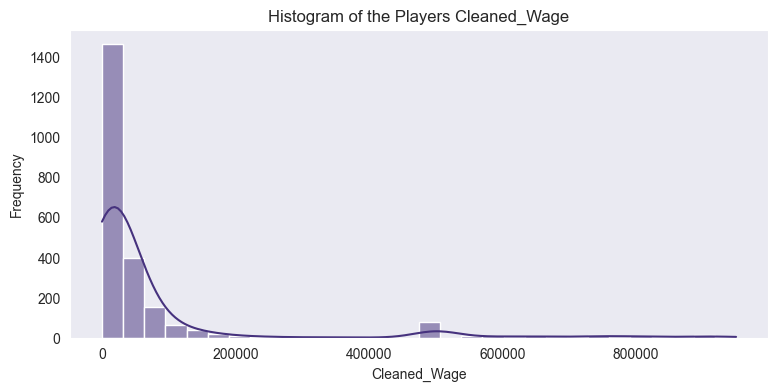

In [44]:
#histogram of wage 
histogram(players.Cleaned_Wage, "Cleaned_Wage",bins=30)

In [45]:
#querying for top 10 most paid players
top_10_most_paid_players = players.sort_values('Cleaned_Wage',ascending=False).head(20)
top_10_most_paid_players

,Age,National_team,Positions,Overall,Potential_overall,Current_club,Current_contract,Value,Wage,Total_stats,Contract_start_year,Contract_end_year,Contract_duration,Cleaned_Wage
Player_name,,,,,,,,,,,,,,
E. Tezgel,17,England,['ST'],56,79,Stoke City,2022 ~ 2025,€450K,€950,1351,2022,2025.0,3.0,950000
L. Krejčí,24,Czech Republic,"['CB', 'CDM', 'CM']",77,84,Sparta Praha,2019 ~ 2025,€19.5M,€950,2013,2019,2025.0,6.0,950000
23\n A. Bencze,20,Hungary,['GK'],62,79,Vitória SC,2020 ~ 2025,€925K,€950,854,2020,2025.0,5.0,950000
P. Yazbek,21,Australia,"['CDM', 'CM']",65,77,Viking,2023 ~ 2026,€1.7M,€950,1742,2023,2026.0,3.0,950000
23\n G. Dănuleasă,19,Romania,['CB'],56,73,SSC Farul,2021 ~ 2023,€350K,€950,1286,2021,2023.0,2.0,950000
Guille Bueno,20,Spain,"['LB', 'LW']",64,75,Borussia Dortmund II,2021 ~ 2026,€1.2M,€900,1621,2021,2026.0,5.0,900000
C. Zafeiris,20,Norway,"['CM', 'CDM']",74,82,Slavia Praha,2023 ~ 2027,€9M,€900,2030,2023,2027.0,4.0,900000
L. Traoré,22,Burkina Faso,['ST'],74,82,Shakhtar Donetsk,2021 ~ 2026,€9.5M,€900,1778,2021,2026.0,5.0,900000
R. Duncan,19,Scotland,"['CAM', 'CM', 'RW']",61,81,Aberdeen,2020 ~ 2024,€925K,€900,1600,2020,2024.0,4.0,900000


### Observations:
    IQR:€42k, lower_Limit: €0k, Upper_Limit: €70.0k
    min wage is 0
    median wage is €19K
    mean wage is 70K
    max wage is €950k
    players below €0k  Wage are 0 
    players above €70k Wage are 389 
    players between €0k Wage and €70k Wage are 1910 
        

### Feature: Value

In [46]:
# checking for nulls 
players.Value.isna().sum()
players.Value

Player_name
T. Almada         €39.5M
L. Palma           €2.2M
R. Lavia             €7M
W. Zaïre-Emery      €24M
Gabri Veiga       €31.5M
                   ...  
D. Polvara         €625K
San Román          €1.4M
F. Hornby          €2.8M
Klauss             €5.5M
T. Băluță          €2.1M
Name: Value, Length: 2299, dtype: object

In [47]:
#value str cleaning 
players['Cleaned_Value'] = players['Value'].apply(lambda x: clean_value(x, 'M') if 'M' in x else clean_value(x, 'K'))
players['Cleaned_Value']


Player_name
T. Almada         39500000
L. Palma           2200000
R. Lavia           7000000
W. Zaïre-Emery    24000000
Gabri Veiga       31500000
                    ...   
D. Polvara          625000
San Román          1400000
F. Hornby          2800000
Klauss             5500000
T. Băluță          2100000
Name: Cleaned_Value, Length: 2299, dtype: int64

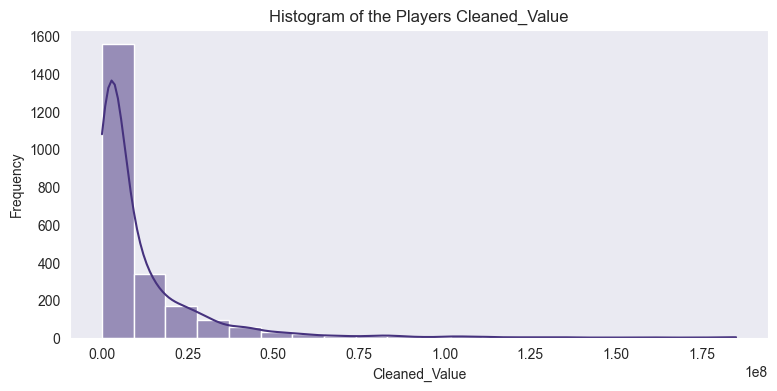

In [48]:
# histogram of players value
histogram(players.Cleaned_Value,"Cleaned_Value")

In [49]:
interquantile_range(players,"Cleaned_Value")

IQR:10600000.0,Lower_Limit:-3400000.0,Upper_Limit:17800000.0
players below -3400000 Cleaned_Value are 0 players
players above 17800000 Cleaned_Value are 420 players
players between -3400000 Cleaned_Value and 17800000 Cleaned_Value are 1879 players


(None, None)

In [53]:
#most valuable player 
most_valued_player = players[players['Cleaned_Value']==players['Cleaned_Value'].max()].index
most_valued_player

Index(['E. Haaland'], dtype='object', name='Player_name')

### Observations:
    IQR:€10,600,000,Lower_Limit:€0,Upper_Limit:€17,800,000.0
    players below  €0 Value are 0 players
    players above €17,800,000 Cleaned_Value are 420 players
    players between €0 Cleaned_Value and €17,800,000 Cleaned_Value are 1879 players
    E. Haaland is the most valuable player at 185M in the data frame